In [1]:
%matplotlib inline
# I import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from qiskit.aqua.utils import split_dataset_to_data_and_labels
from qiskit.aqua.input import ClassificationInput
from qiskit.aqua import run_algorithm
from sklearn.metrics import confusion_matrix
from qiskit import Aer
import qiskit
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.save_account('c26897ff990067073ec8c8d258189a4f15895ec04c41fe2ff91c0f3626d919247bc74d7f7062d05a6adc849fcfadbd9c7b08403bb836f26003edd00e8da00003',overwrite=True)
provider = IBMQ.load_account()

# QSVM Classification on the Breast Cancer Dataset
The dataset used in my work is publicly available on the internet. It was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA

The dataset describes characteristics of the cells found in different types of breast cancers.
Each cancerous mass is classified as Malignant or Benign. 

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.researchgate.net/publication/327528970/figure/fig2/AS:776781296582657@1562210501567/BreakHis-dataset-composed-of-benign-and-malignant-images-benign-a-adenosis-b.jpg"
      , width=800, height=800)

In [4]:
# I import the breast cancer dataset
# classified based on whether the tumor is malignant or not (1 = Yes, 0 = No)
# 0 = Benign 
# 1 = Malignant
dataset = datasets.load_breast_cancer()

class_labels = ['Benign', 'Malignant']
    
# I divide the dataset into a training set and a test set (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data,
                                                    dataset.target, test_size=0.3)
# I visualize the data using pandas
df_cancer = pd.DataFrame( np.c_[dataset['data'], dataset['target']],
                         columns = np.append(dataset['feature_names'], ['target']))
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
df_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


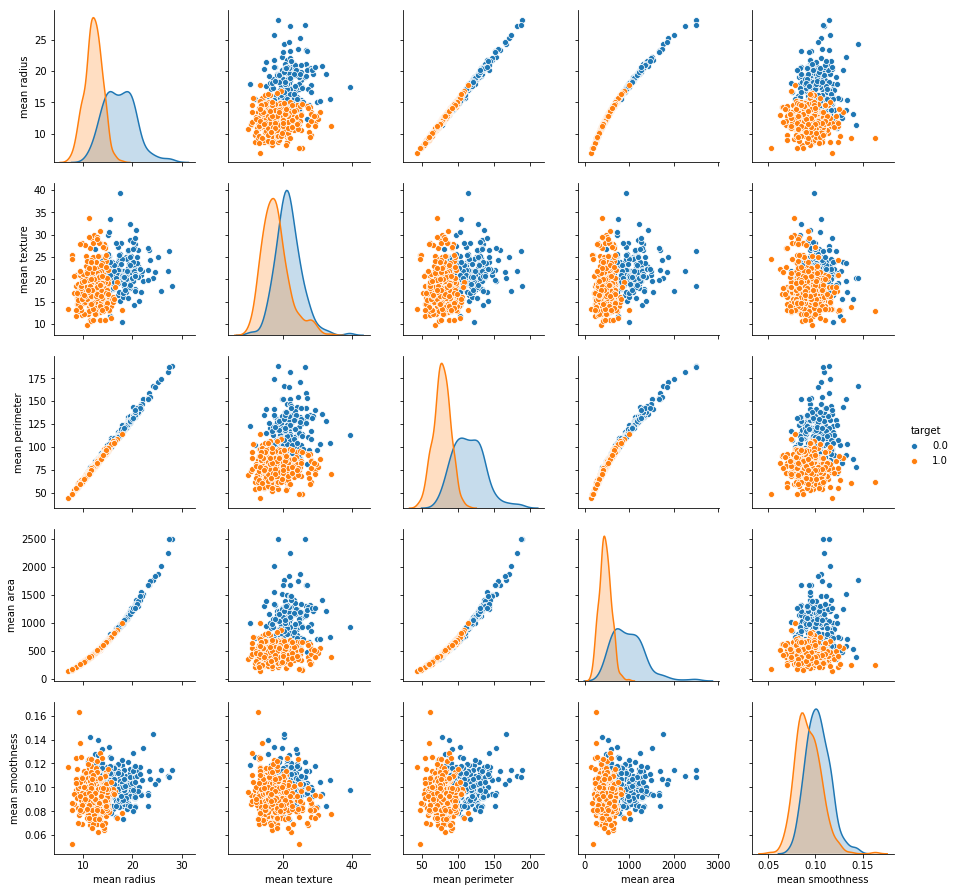

In [6]:
sns.pairplot(df_cancer, hue = 'target',
            vars = ['mean radius', 'mean texture',
                    'mean perimeter','mean area','mean smoothness'])
plt.savefig("plot1.png")

In [7]:
# I scale the data to fit it to a normal distribution
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
n_dim = 2

# I use PCA to reduce the number of dimensions of the dataset down to n_dim = 2
pca = PCA(n_components=n_dim).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [9]:
# I scale the data between -1 and 1
samples = np.append(X_train, X_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
X_train = minmax_scale.transform(X_train)
X_test = minmax_scale.transform(X_test)

In [10]:
print(len(X_train),len(X_test))

def select_training_test_size(training_size=None, test_size=None):
    
    if not training_size==None:
        # I restrict the training data and test data
        training_input = {key: (X_train[Y_train == k, :])[:training_size] 
                          for k, key in enumerate(class_labels)}
        test_input = {key: (X_test[Y_test == k, :])[:test_size]
                      for k, key in enumerate(class_labels)}
        
    else:
        # I keep the whole dataset
        training_input = {key: (X_train[Y_train == k, :])
                          for k, key in enumerate(class_labels)}
        test_input = {key: (X_test[Y_test == k, :])
                      for k, key in enumerate(class_labels)}
    return training_input, test_input

training_input, test_input = select_training_test_size()
count, count2 = 0, 0
for l in training_input.values():
    count+=len(l)
for l in test_input.values():
    count2+=len(l)
print(count, count2, count+count2)

398 171
398 171 569


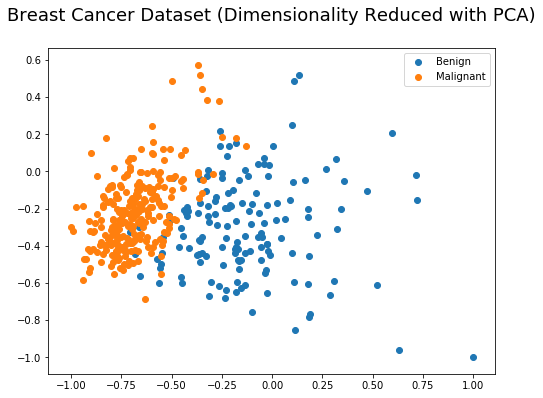

In [11]:
# I plot the 2D representation of the data, reduced in dimensionality using PCA
plt.figure(figsize=(8, 6))
for k in range(0, 2):
    x_axis_data = X_train[Y_train == k, 0][:len(X_train)]
    y_axis_data = X_train[Y_train == k, 1][:len(X_train)]  
    if k is 1:
        label = 'Malignant'
    else:
        label = 'Benign'
    plt.scatter(x_axis_data, y_axis_data, label=label)
plt.title("Breast Cancer Dataset (Dimensionality Reduced with PCA)\n",
          fontdict = {'fontsize': 18})
plt.legend()
plt.savefig("plot2.png")
plt.show()

In [12]:
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)

params = {
    'problem': {'name': 'classification', 'random_seed': 7070},
    'algorithm': { 'name': 'QSVM' },
    'backend': {'name': 'qasm_simulator', 'shots': 1000},
    'feature_map': {'name': 'SecondOrderExpansion', 
                    'depth': 2, 'entanglement': 'linear'}
}

backend = Aer.get_backend('qasm_simulator')

algo_input = ClassificationInput(training_input, test_input, datapoints[0])
%time result = run_algorithm(params, algo_input, backend=backend)

Entry point 'HartreeFock = qiskit.chemistry.aqua_extensions.components.initial_states:HartreeFock' requirements issue: (jsonschema 3.0.1 (/opt/conda/lib/python3.7/site-packages), Requirement.parse('jsonschema<2.7,>=2.6'))
Entry point 'UCCSD = qiskit.chemistry.aqua_extensions.components.variational_forms:UCCSD' requirements issue: (jsonschema 3.0.1 (/opt/conda/lib/python3.7/site-packages), Requirement.parse('jsonschema<2.7,>=2.6'))
/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)
/opt/conda/lib/pyt

CPU times: user 55min 7s, sys: 3min 4s, total: 58min 11s
Wall time: 1h 27min 39s


In [13]:
print("ground truth:    {}".format(datapoints[1]))
print("prediction:      {}".format(result['predicted_labels']))
print("predicted class: {}".format(result['predicted_classes']))
print("accuracy:        {}".format(result['testing_accuracy']))

ground truth:    [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
prediction:      [0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1
 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0]
predicted class: ['Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Be

In [14]:
print(classification_report(datapoints[1], result['predicted_labels'], 
                            target_names=dataset.target_names))

              precision    recall  f1-score   support

   malignant       0.46      0.91      0.61        64
      benign       0.87      0.36      0.51       107

    accuracy                           0.57       171
   macro avg       0.66      0.64      0.56       171
weighted avg       0.71      0.57      0.55       171



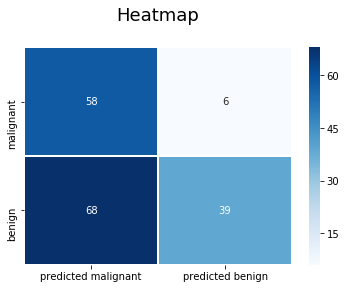

In [15]:
cm = np.array(confusion_matrix(datapoints[1], result['predicted_labels']))
confusion = pd.DataFrame(cm, index=dataset.target_names, 
                         columns= ['predicted ' + s for s in dataset.target_names])

sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, cmap="Blues")
plt.title("Heatmap\n", fontdict = {'fontsize': 18})
plt.savefig("plot6.png")
plt.show()